### Import essential Python libraries 

In [1]:
#Import Essential libraries 
import pandas as pd
import numpy  as np 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Set properties for displays 

In [2]:
#It is essential to display all the columns under one screen to get better insights.By default,Python displays top few and last few columns. 
pd.set_option('display.max_columns',100)

#Setting properties for floating point numbers
pd.options.display.float_format = '{:,.2f}'.format

#### We will perform the following steps to identify the driver variables which could meet the business objective of Lending Club . Recommended variables can be used by Lending Club investors to predict whether to approve or reject the loan application.

1. Data Understanding
2. Data Cleaning
3. Derived Metrics
4. Univariate and Segmented Univariate Analysis
5. Bivariate Analysis & Multivariate Analysis 


Atlast , We will represent the conclusion of data analysis using EDA . 

###  Data understanding

In [3]:
#Read the data to Python dataframe
loan_df = pd.read_csv('loan.csv')

#Check few records
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.

In [4]:
#Shape of the Dataframe
loan_df.shape

(39717, 111)

In [5]:
#Datatype of various columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


*Shape indicates that the dataframe has 39717 rows and 111 columns*

In [6]:
#Metrics of the dataframe
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

##### Seems there are many columns having missing data (count is zero from the metrics above ) , Let's begin with cleaning data 
- Remove columns with all missing values
- Remove columns not needed for analysis as per business understanding
- Rename column names if needed.
- Checking and removing duplicate rows(Deduplicate data).
- Remove outliers if present and impacting the metrics.
- Standardise text(Standardise case,removing extra charaters,standardise format),if required. 
- Correction of data type of certain columns for computation ,if needed.
- identify target columns

### Data cleaning 

In [7]:
#Check percentage of missing values in each column 

na_c = round(loan_df.isnull().sum()/len(loan_df.index),2)*100

na_c

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.00
emp_length                         3.00
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              33.00
purpose                            0.00
title                              0.00
zip_code                           0.00
addr_state                         0.00
dti                                0.00


*Seems many columns having 100% missing values and some columns having missing values percentage such as 33%,65% etc.

In [8]:
#Identify columns having more than 50% missing values
na_c = na_c[na_c.values > 50]
na_c

mths_since_last_delinq            65.00
mths_since_last_record            93.00
next_pymnt_d                      97.00
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00
open_rv_24m                      100.00
max_bal_bc                       100.00
all_util                         100.00
total_rev_hi_lim                 100.00
inq_fi                           100.00
total_cu_tl                      100.00
inq_last_12m                     100.00
acc_open_past_24mths             100.00


In [9]:
#Dropping columns with all missing values(100%)
loan_df.dropna(axis = 1,how = 'all',inplace = True)
loan_df.shape

(39717, 57)

In [10]:
#Dropping columns having null percentage other than 100 , 
na_c = na_c[na_c.values != 100]

na_c = list(na_c[na_c.values != 100].index)
na_c

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [11]:
#Columns mths_since_last_record,mths_since_last_delinq,next_pymnt_d  have huge missing values and also doesnt seems to add value in analysis,

#Dropping mths_since_last_record,mths_since_last_delinq,next_pymnt_d

loan_df.drop(labels = na_c,axis = 1,inplace=True)

In [12]:
#Checking shape again
loan_df.shape

(39717, 54)

In [13]:
#Percentage of missing values in each row ,we can remove rows where percentage of missing values is greater than 40%.
na_rows = round(loan_df.transpose().isnull().sum()/len(loan_df.index),2)*100
na_rows = na_rows[na_rows.values > 40]

na_rows

Series([], dtype: float64)

*There are no rows having missing values greater than 40%*

##### Now, we are left with 54 columns for further analysis , let's check number of duplicate rows. If any ,we will remove them keeping only the first occurance.

In [14]:
#Check and remove duplicates

loan_df.duplicated(keep='first').sum()


0

*#Seems we have no duplicate rows in loan dataframe*

#### Filter variables based on business undrstanding.

In [15]:
#list of columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### *Removing variables based on business understanding, there are broadly three types of variables -:
1. Those which are related to the applicant(demographic variables such as occupation,employment details etc.)
2. Loan characteristics(amount, interest rate,purpose of loan etc.)
3. Customer behaviour variables(these variables are generated after loan is approved such as next payment date,revolving balance etc.)

-For our analysis we don't need Customer behaviour variables as these variables are not available at the time of loan application and thus cannot be used as predictors for credit approval.

In [16]:
#Remove variables representing customer behaviour + other variables if required 

# 1. Take backup of the dataframe
loan_df2 = loan_df.copy()

In [17]:
# 2. Removing 'id','member_id','url','zip_code','desc','title' along with customer behaviour variables .
col_to_remove = ['id','member_id','url','zip_code','delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
        'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens','desc','title']
loan_df2.drop(labels = col_to_remove,axis = 1,inplace=True)

In [18]:
loan_df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,application_type
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,INDIVIDUAL
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,car,GA,1.00,INDIVIDUAL
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,INDIVIDUAL
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,INDIVIDUAL
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,other,OR,17.94,INDIVIDUAL


#### Columns are having datatype 'object' ,let's convert to numeric for computations 

In [19]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null object
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_title              37258 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
application_type       39717 non-n

In [20]:
#Removing percentage sign from interest rate column i.e int_rate
loan_df2['int_rate'] = loan_df2['int_rate'].apply(lambda x : x.rstrip('%'))

In [21]:
#conveting interest rate column to numeric
loan_df2['int_rate'] = loan_df2['int_rate'].apply(pd.to_numeric)
loan_df2['int_rate'].dtype

dtype('float64')

### Derived Metrics - We will derive new columns from existing which will contribute in our analysis. 

In [22]:
#Monthly income of the borrower 
loan_df2['monthly_inc'] = loan_df2['annual_inc'] / 12

In [23]:
#Loan amount to Annual income ratio
loan_df2['loan_ann'] = round(loan_df2['loan_amnt']/loan_df2['annual_inc'],2)

In [24]:
#Issue date
loan_df2['issue_month'],loan_df2['issue_year'] = loan_df2['issue_d'].str.split('-',1).str

#Checking issue_year 
loan_df2[['issue_year','issue_month','monthly_inc']].head()

,issue_year,issue_month,monthly_inc
0,11,Dec,"2,000.00"
1,11,Dec,"2,500.00"
2,11,Dec,"1,021.00"
3,11,Dec,"4,100.00"
4,11,Dec,"6,666.67"


In [25]:
#Issue year is not giving the correct representation ,as data is from year 2007 to 2011 ,we can append '20' in the begining of each column value .
loan_df2['issue_year']= '20' + loan_df2['issue_year'].astype(str)

loan_df2['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: object

In [26]:
#Create bins for Annual income
bins = [0, 20000, 40000, 60000, 80000,100000]
slot = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 and above']
loan_df2['annual_inc_rnge'] = pd.cut(loan_df2['annual_inc'], bins, labels=slot)


In [27]:
#Create bins for loan amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_df2['loan_amnt_range'] = pd.cut(loan_df2['loan_amnt'], bins, labels=slot)

In [28]:
#Create bins for interest rate
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_df2['int_rate_range'] = pd.cut(loan_df2['int_rate'], bins, labels=slot)


## Data Analysis 

#### There are two types of variables - Continous variables and categorical variables.  We will perform analysis on these variables to get the insights.

Data Analysis - Univariate Analysis.
Data Analysis - Bivariate Analysis

*Target variable -- > loan_status*
*There are three types of loan status 'Fully Paid', 'Charged Off', 'Current'.* 
*The ones marked as 'Current' are ongoing loans(neither paid nor defaulted). Hence,remove rows where Loan status is marked as current.*

In [29]:
loan_df2 = loan_df2[~(loan_df2['loan_status'] == 'Current')]

loan_df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,application_type,monthly_inc,loan_ann,issue_month,issue_year,annual_inc_rnge,loan_amnt_range,int_rate_range
0,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,INDIVIDUAL,"2,000.00",0.21,Dec,2011,20000-40000,0-5000,10-12.5
1,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,car,GA,1.00,INDIVIDUAL,"2,500.00",0.08,Dec,2011,20000-40000,0-5000,15 and above
2,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,INDIVIDUAL,"1,021.00",0.20,Dec,2011,0-20000,0-5000,15 and above
3,10000,10000,"10,000.00",36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,INDIVIDUAL,"4,100.00",0.20,Dec,2011,40000-60000,5000-10000,12.5-15
5,5000,5000,"5,000.00",36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,INDIVIDUAL,"3,000.00",0.14,Dec,2011,20000-40000,0-5000,7.5-10


In [30]:
loan_df2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'application_type', 'monthly_inc', 'loan_ann', 'issue_month',
       'issue_year', 'annual_inc_rnge', 'loan_amnt_range', 'int_rate_range'],
      dtype='object')

## Univariate/Segmented-Univariate Analysis

#### 1. Annual Income

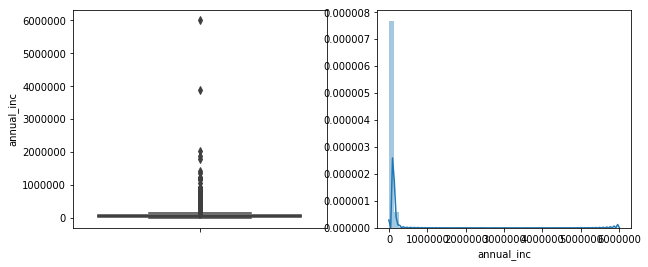

In [31]:
#Distplot and boxplot to understand the distribution and interquartile range
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.boxplot(data =loan_df2, x='annual_inc',ax=ax[0],orient = 'v')
sns.distplot(loan_df2['annual_inc'],ax=ax[1])

In [32]:
#Metrics for annual_inc
loan_df2['annual_inc'].describe()

count      38,577.00
mean       68,777.97
std        64,218.68
min         4,000.00
25%        40,000.00
50%        58,868.00
75%        82,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

*Minimum annual income is 4000 whereas maximum annual income is about 100 times of mean ,which indicates presence of an outlier ,let's remove outlier to get the correct mean*

In [33]:
#Removing outlier
outlr = loan_df2["annual_inc"].quantile(0.993)
loan_df2 = loan_df2[loan_df2["annual_inc"] < outlr]
loan_df2["annual_inc"].describe()

count    38,306.00
mean     65,862.00
std      36,495.82
min       4,000.00
25%      40,000.00
50%      58,000.00
75%      81,000.00
max     267,000.00
Name: annual_inc, dtype: float64

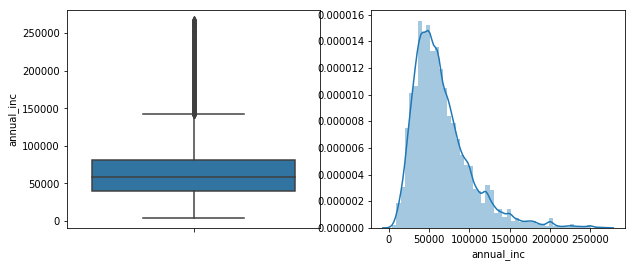

In [34]:
#Creating plot again after removing outliers
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.boxplot(data =loan_df2, x='annual_inc',ax=ax[0],orient = 'v')
sns.distplot(loan_df2['annual_inc'],ax=ax[1])

#### Most of the annual income is distributed between 40000 and 80000

#### 2. Loan amount 

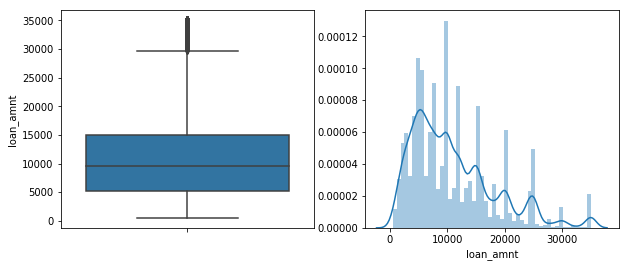

In [35]:
#Plots for Loan amount
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.boxplot(data =loan_df2, x='loan_amnt',ax=ax[0],orient='v')
sns.distplot(loan_df2['loan_amnt'],ax=ax[1])

#### Most of the loans are distributed between 5500 and 15000

#### 3.Interest Rate

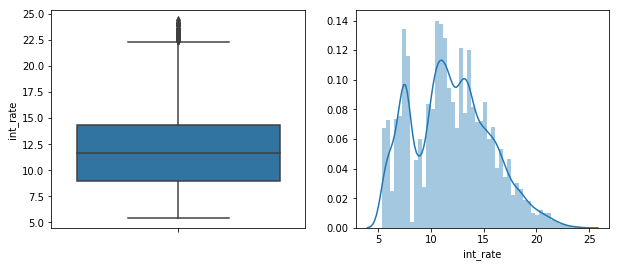

In [36]:
#Plots for interest rate 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.boxplot(data =loan_df2, x='int_rate',ax=ax[0],orient='v')
sns.distplot(loan_df2['int_rate'],ax=ax[1])

#### Most of interest rates are between 9 to 14%

#### 4. Loan status

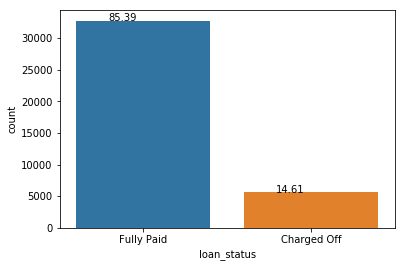

In [37]:
#Plots for loan status
fig,ax = plt.subplots(nrows=1,ncols=1)
sns.countplot(x='loan_status',data=loan_df2)

for p in ax.patches:
    ax.annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.19, p.get_height()+20))
                      
plt.show()

*More than 30k applicants have fully paid the loan , Charged off(Default) applicant count is around 5000 , which is about 14.6 percent.*

#### 5. Purpose of loan

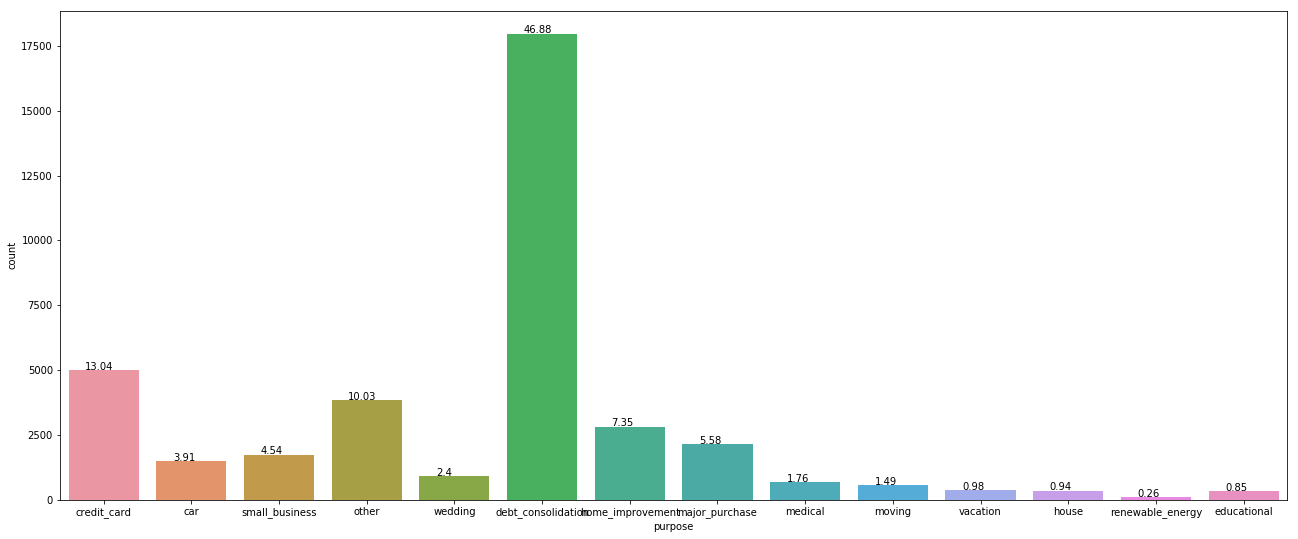

In [38]:
#plot for purpose of loan
fig,ax = plt.subplots(figsize=(22,9))
sns.countplot(x='purpose',data=loan_df2)
for p in ax.patches:
    ax.annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.19, p.get_height()+20))
                      
plt.show()

Most of the loans have been taken for debt consolidation

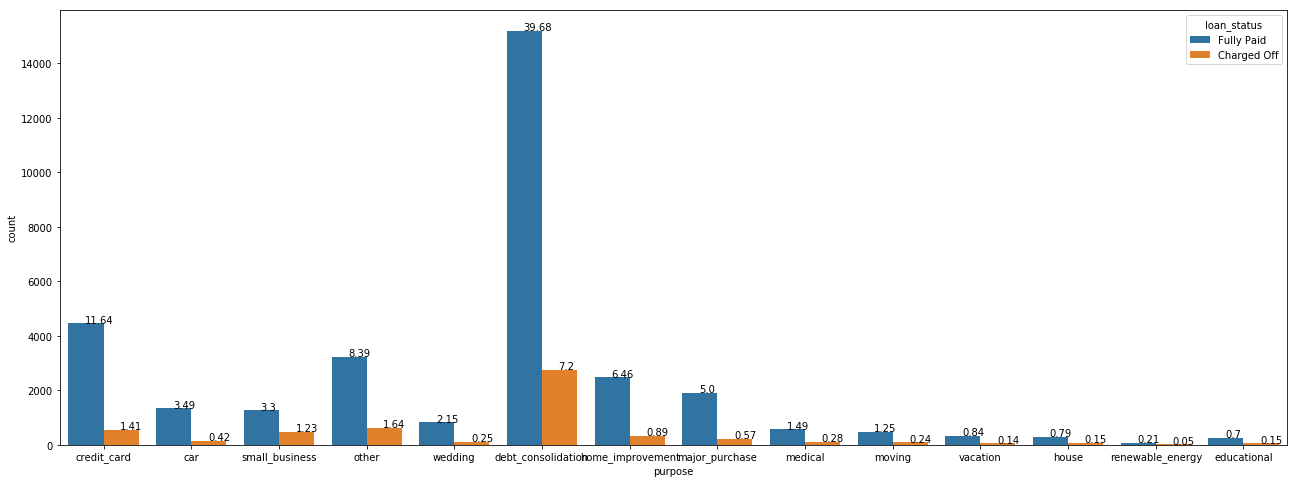

In [39]:
#with hue as loan status 
fig,ax = plt.subplots(figsize=(22,8))
sns.countplot(x='purpose',data=loan_df2,hue='loan_status')
for p in ax.patches:
    ax.annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.19, p.get_height()+20))
                      
plt.show()

*Around 46.8% the loans are taken for  debt consolidation* 

#### 6. Loan term

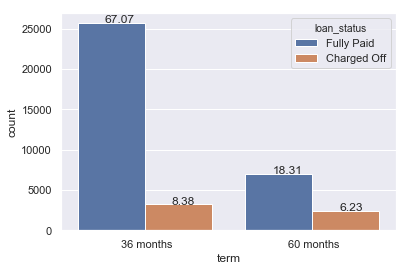

In [40]:
#plot for loan term 
sns.set(style="darkgrid")
fig,ax = plt.subplots()
ax1 = sns.countplot(x='term',data=loan_df2,order=loan_df2['term'].value_counts().index,hue='loan_status')

for p in ax1.patches:
         ax1.annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.16, p.get_height()+20))
                      
plt.show()

*More than 75% of the borrowers opted for 36months loan term.* 

#### 7.Home ownership

In [41]:
loan_df2.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [42]:
# Removing rows where value is other or none
colsRemove = ['OTHER', 'NONE']
loan_df2.drop(loan_df2[loan_df2['home_ownership'].isin(colsRemove)].index,inplace=True)
loan_df2.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

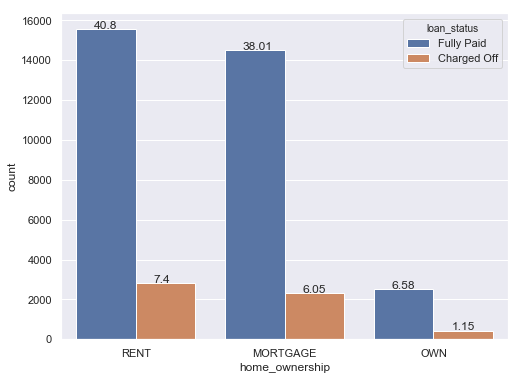

In [43]:
#plot for home_ownership
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(x='home_ownership',data=loan_df2,order=loan_df2['home_ownership'].value_counts().index,hue='loan_status')
for p in ax.patches:
         ax.annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.12, p.get_height()+10))
                      
plt.show()


*More than 48% of applicants are staying on rent, less percentage of applicants i.e.around 7.6% have their own home*

#### 8.Grade

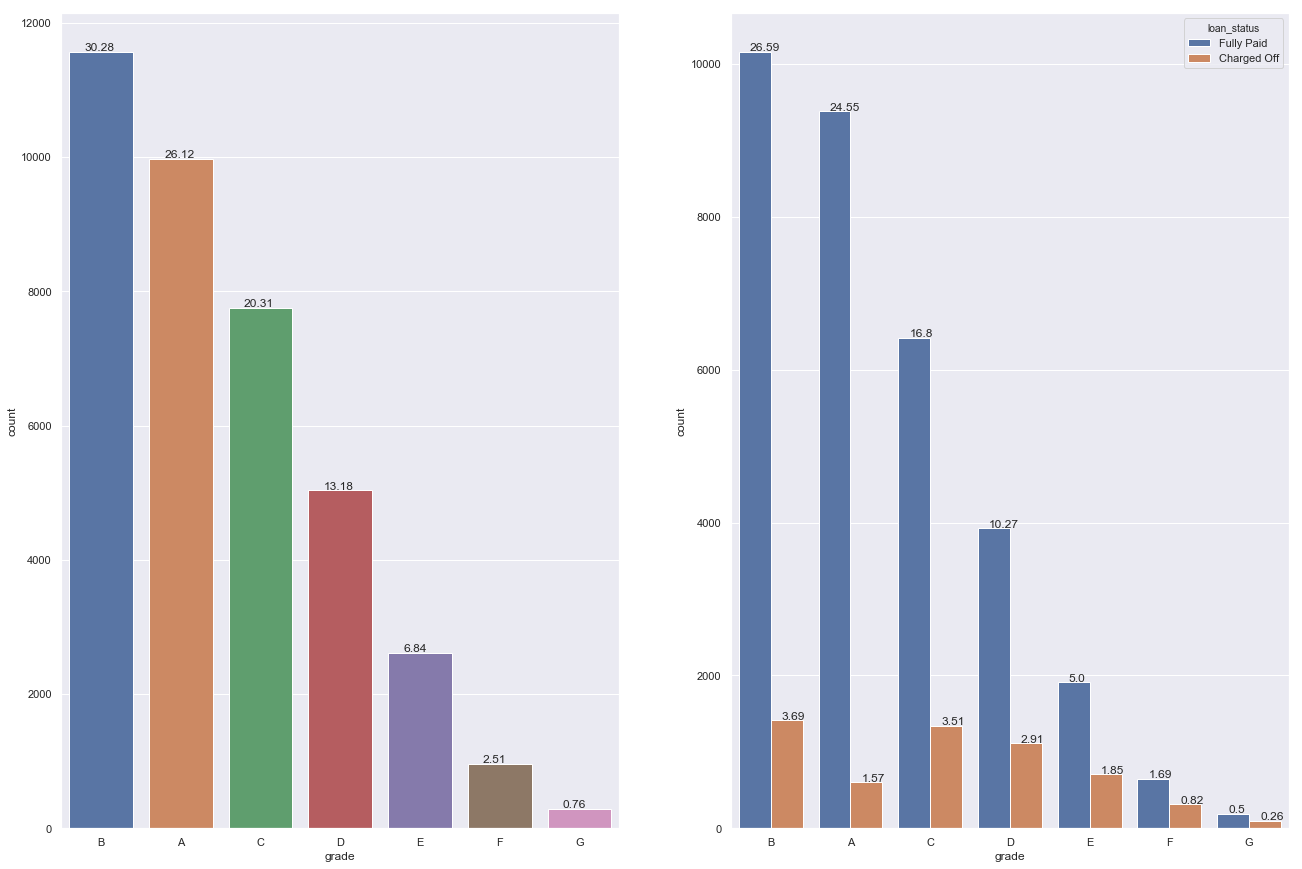

In [44]:
#plots for grade 
fig,ax = plt.subplots(1,2,figsize=(22,15))
sns.countplot(x='grade',data=loan_df2,order=loan_df2['grade'].value_counts().index,ax=ax[0])
sns.countplot(x='grade',data=loan_df2,order=loan_df2['grade'].value_counts().index,ax=ax[1],hue='loan_status')
for p in ax[0].patches:
         ax[0].annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.19, p.get_height()+10))
for p in ax[1].patches:
         ax[1].annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.14, p.get_height()+10))
plt.show()


*30% of loans belongs to grade B ,about 26% belongs to grade A*

#### 9.Issue year

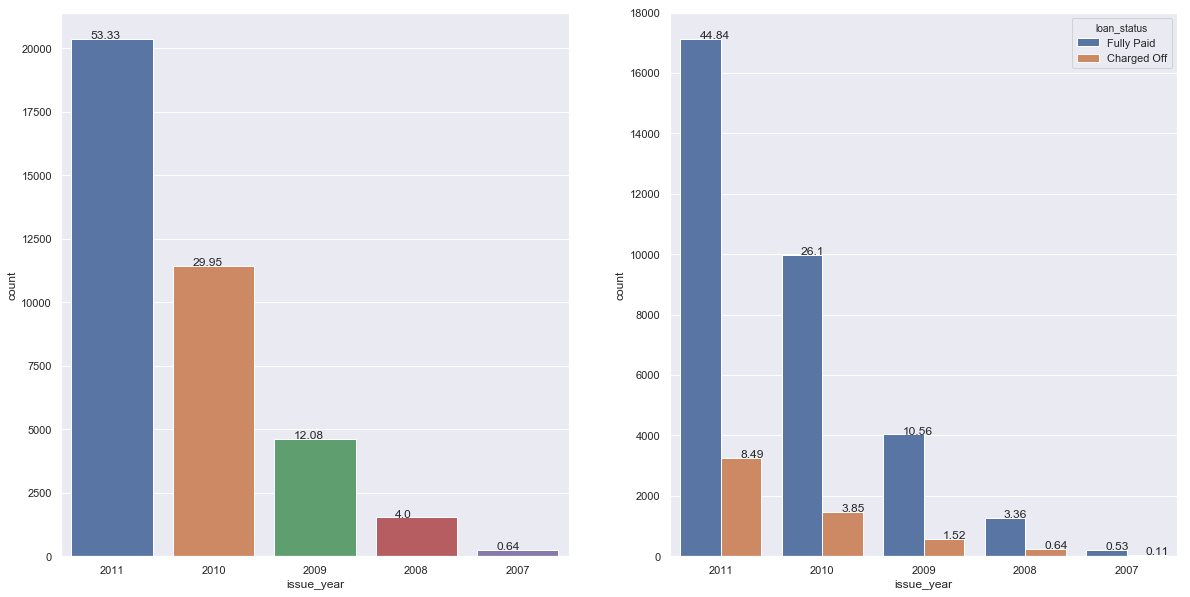

In [45]:
#plots for issue year
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='issue_year',data=loan_df2,order=loan_df2['issue_year'].value_counts().index,ax=ax[0])
for p in ax[0].patches:
         ax[0].annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.19, p.get_height()+12))
        
sns.countplot(x='issue_year',data=loan_df2,order=loan_df2['issue_year'].value_counts().index,hue='loan_status',ax=ax[1])
for p in ax[1].patches:
         ax[1].annotate(round((p.get_height()/len(loan_df2))*100,2), (p.get_x()+0.19, p.get_height()+12))

*53% of total loans was applied in year 2011,out of which 8.5% of loans were charged off in 2011*

## Bivariate/Multivariate Analysis

In [46]:
#Columns considering for further analysis
loan_df2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'application_type', 'monthly_inc', 'loan_ann', 'issue_month',
       'issue_year', 'annual_inc_rnge', 'loan_amnt_range', 'int_rate_range'],
      dtype='object')

#### Correlation Matrix : All Continuos(Numeric) Variables

In [47]:
#Pandas corr() method to determine correlation matrix - indicating correlation b/w variables with value b/w -1 to 1
loan_corr = loan_df2.corr()
loan_corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,monthly_inc,loan_ann
loan_amnt,1.00,0.98,0.94,0.30,0.93,0.42,0.07,0.42,0.62
funded_amnt,0.98,1.00,0.96,0.30,0.96,0.41,0.07,0.41,0.61
funded_amnt_inv,0.94,0.96,1.00,0.30,0.91,0.39,0.08,0.39,0.58
int_rate,0.30,0.30,0.30,1.00,0.28,0.07,0.11,0.07,0.21
installment,0.93,0.96,0.91,0.28,1.00,0.41,0.06,0.41,0.56
annual_inc,0.42,0.41,0.39,0.07,0.41,1.00,-0.11,1.00,-0.31
dti,0.07,0.07,0.08,0.11,0.06,-0.11,1.00,-0.11,0.14
monthly_inc,0.42,0.41,0.39,0.07,0.41,1.00,-0.11,1.00,-0.31
loan_ann,0.62,0.61,0.58,0.21,0.56,-0.31,0.14,-0.31,1.00


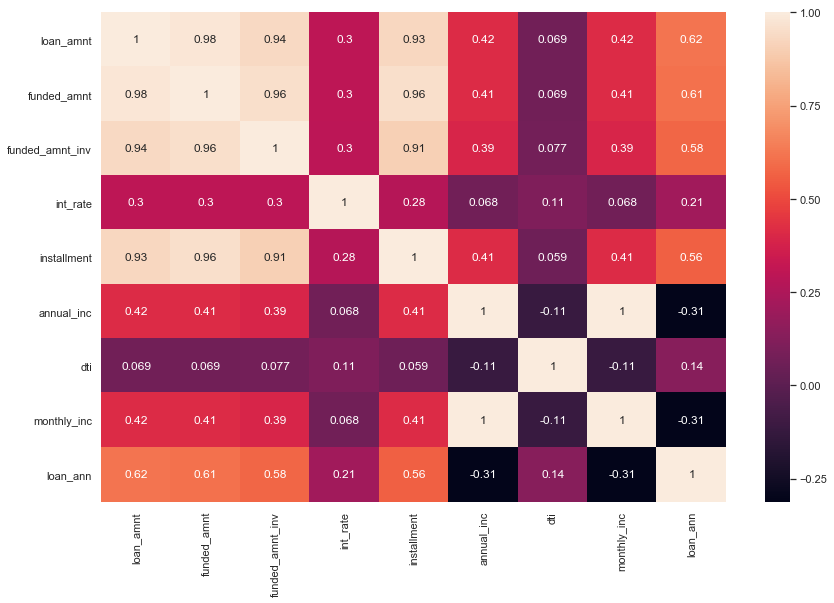

In [48]:
#Plotting heat map
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_corr, 
            xticklabels=loan_corr.columns.values,
            yticklabels=loan_corr.columns.values,annot= True)
plt.show()

*loan_amnt,funded_amnt and funded_amnt_inv are highly correlated*

#### Annual income vs Loan Amount for each loan status 

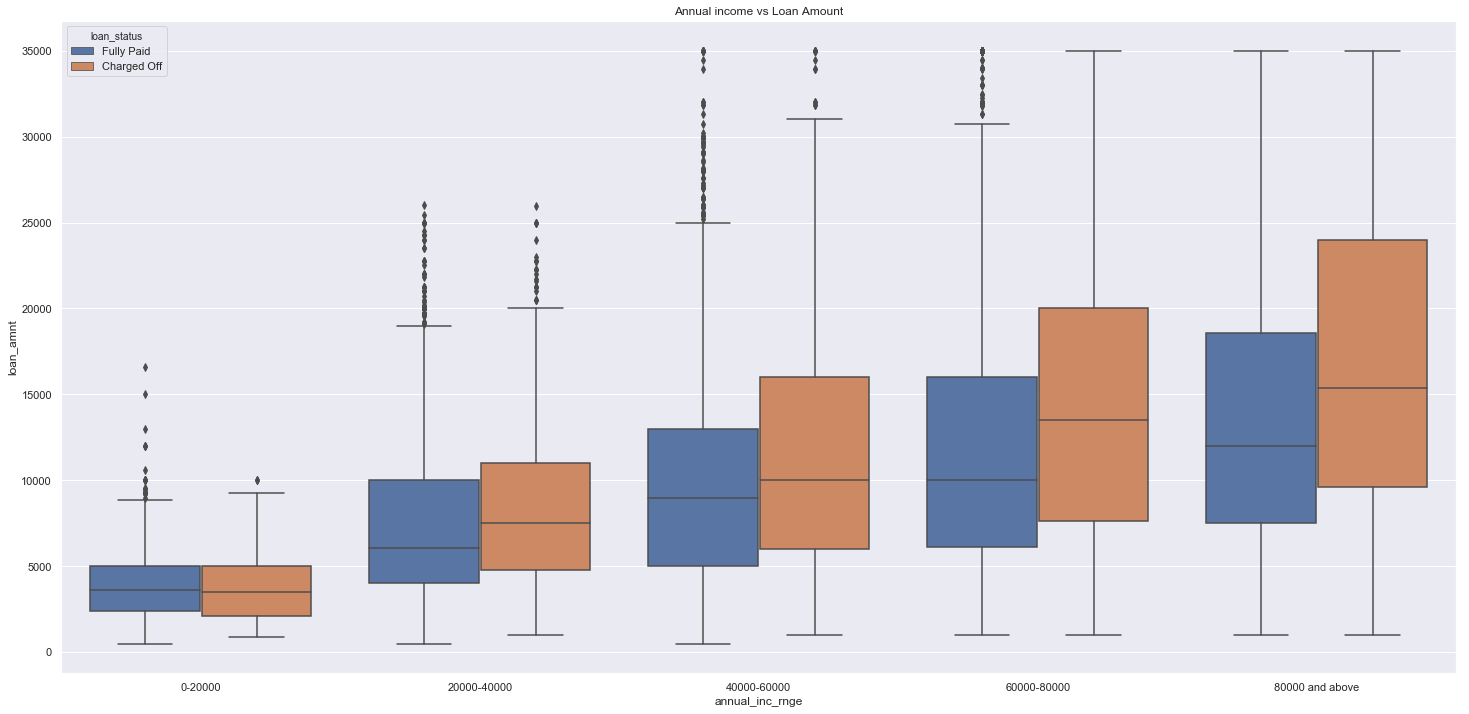

In [49]:
plt.figure(figsize=(25,12))
sns.boxplot(data =loan_df2, x='annual_inc_rnge', y='loan_amnt',hue ='loan_status') 
plt.title('Annual income vs Loan Amount')
plt.show()

*Increase in annual income leads to slight increase in  loan amount*

#### Purpose of Loan vs Loan Amount for each Loan Status. 

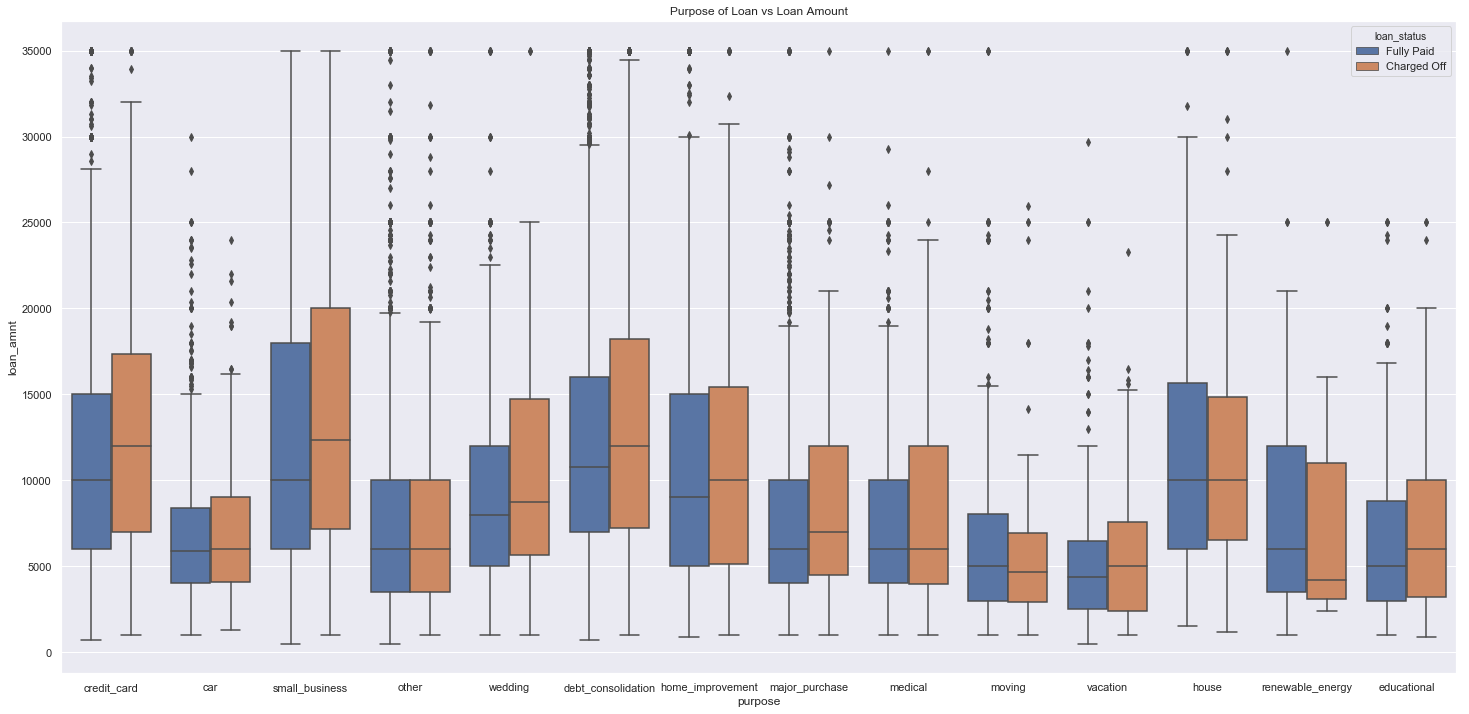

In [50]:
plt.figure(figsize=(25,12))
sns.boxplot(data =loan_df2, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

Small Business has drawn the highest amount of loan

#### Verification Status vs Probability of Charged Off

In [51]:
default_ver = loan_df2.groupby(['verification_status','loan_status'])['loan_status'].count().unstack().fillna(0)
default_ver['Total'] = default_ver['Charged Off'] + default_ver['Fully Paid'] 
default_ver['Probability_of_Charged_Off'] = default_ver['Charged Off'] / default_ver['Total'] 

default_ver

loan_status,Charged Off,Fully Paid,Total,Probability_of_Charged_Off
verification_status,,,,
Not Verified,2124,14445,16569,0.13
Source Verified,1425,8157,9582,0.15
Verified,2031,10024,12055,0.17


Text(0, 0.5, 'Probability of Charged Off')

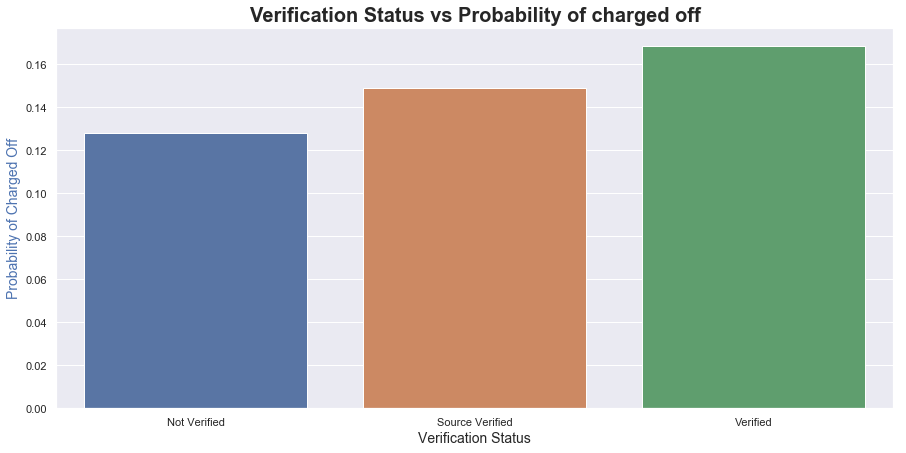

In [52]:
#Verification Status vs Probability of charged off
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=default_ver.index,y='Probability_of_Charged_Off',data=default_ver)
ax.set_title('Verification Status vs Probability of charged off',fontsize=20,weight="bold")
ax.set_xlabel('Verification Status',fontsize=14)
ax.set_ylabel('Probability of Charged Off',color = 'b',fontsize=14)


*From the above graph , it can infer that the verification has not much impact on predicting the loan which will be charged off as even the verified applicants has the highest probability of charged off ,whereas applicants which are not verified has lowest probability of charged off.*

#### Employment Length vs Probability of Charged Off

In [53]:
default_emp = loan_df2.groupby(['emp_length','loan_status'])['loan_status'].count().unstack().fillna(0)

In [54]:
default_emp['Total'] = default_emp['Charged Off'] + default_emp['Fully Paid'] 
default_emp['Probability of Charged Off'] = default_emp['Charged Off'] / default_emp['Total'] 

Text(0, 0.5, 'Probability of Charged Off')

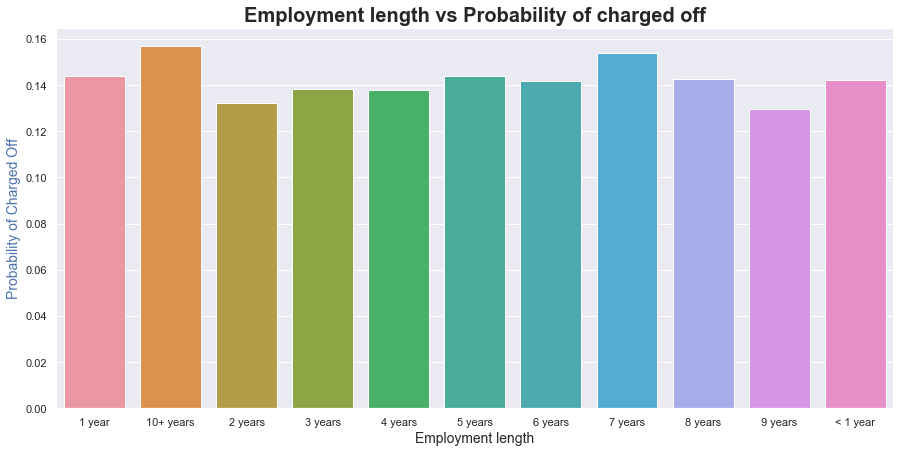

In [55]:
#Employment Length vs Probability of Charged Off
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=default_emp.index,y='Probability of Charged Off',data=default_emp)
ax.set_title('Employment length vs Probability of charged off',fontsize=20,weight="bold")
ax.set_xlabel('Employment length',fontsize=14)
ax.set_ylabel('Probability of Charged Off',color = 'b',fontsize=14)

*Probability of charged off is somewhat same for all the employment length , seems employment length doesn't have much impact on the loan being charged off*

#### Annual income Vs Probability of Charged off

In [56]:
default_ann = loan_df2.groupby(['annual_inc_rnge','loan_status'])['loan_status'].count().unstack().fillna(0)

In [57]:
default_ann['Total'] = default_ann['Charged Off'] + default_ann['Fully Paid'] 
default_ann['Probability_of_Charged_Off'] = default_ann['Charged Off'] / default_ann['Total'] 

In [58]:
default_ann

loan_status,Charged Off,Fully Paid,Total,Probability_of_Charged_Off
annual_inc_rnge,,,,
0-20000,237,940,1177,0.20
20000-40000,1508,6985,8493,0.18
40000-60000,1725,9512,11237,0.15
60000-80000,1019,6583,7602,0.13
80000 and above,529,3969,4498,0.12


Text(0, 0.5, 'Probability of Charged Off')

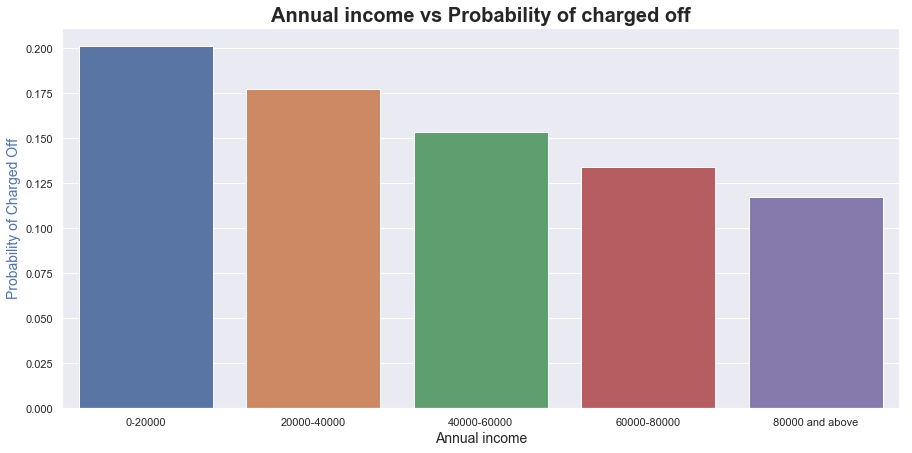

In [59]:
#Annual income vs Probability of charged off
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=default_ann.index,y='Probability_of_Charged_Off',data=default_ann)
ax.set_title('Annual income vs Probability of charged off',fontsize=20,weight="bold")
ax.set_xlabel('Annual income',fontsize=14)
ax.set_ylabel('Probability of Charged Off',color = 'b',fontsize=14)

*Applicants with less annual income are more likely to default their loans , As the annual income is increasing ,Probability of Charged off is decreasing*

### Purpose vs Probability of charged off

In [60]:
default_purp = loan_df2.groupby(['purpose','loan_status'])['loan_status'].count().unstack().fillna(0)

In [61]:
default_purp['Total'] = default_purp['Charged Off'] + default_purp['Fully Paid'] 
default_purp['Probability_of_Charged_Off'] = default_purp['Charged Off'] / default_purp['Total'] 
default_purp

loan_status,Charged Off,Fully Paid,Total,Probability_of_Charged_Off
purpose,,,,
car,159,1336,1495,0.11
credit_card,538,4448,4986,0.11
debt_consolidation,2751,15164,17915,0.15
educational,56,265,321,0.17
home_improvement,339,2471,2810,0.12
house,58,301,359,0.16
major_purchase,220,1909,2129,0.10
medical,106,566,672,0.16
moving,90,480,570,0.16


Text(0, 0.5, 'Probability of Charged Off')

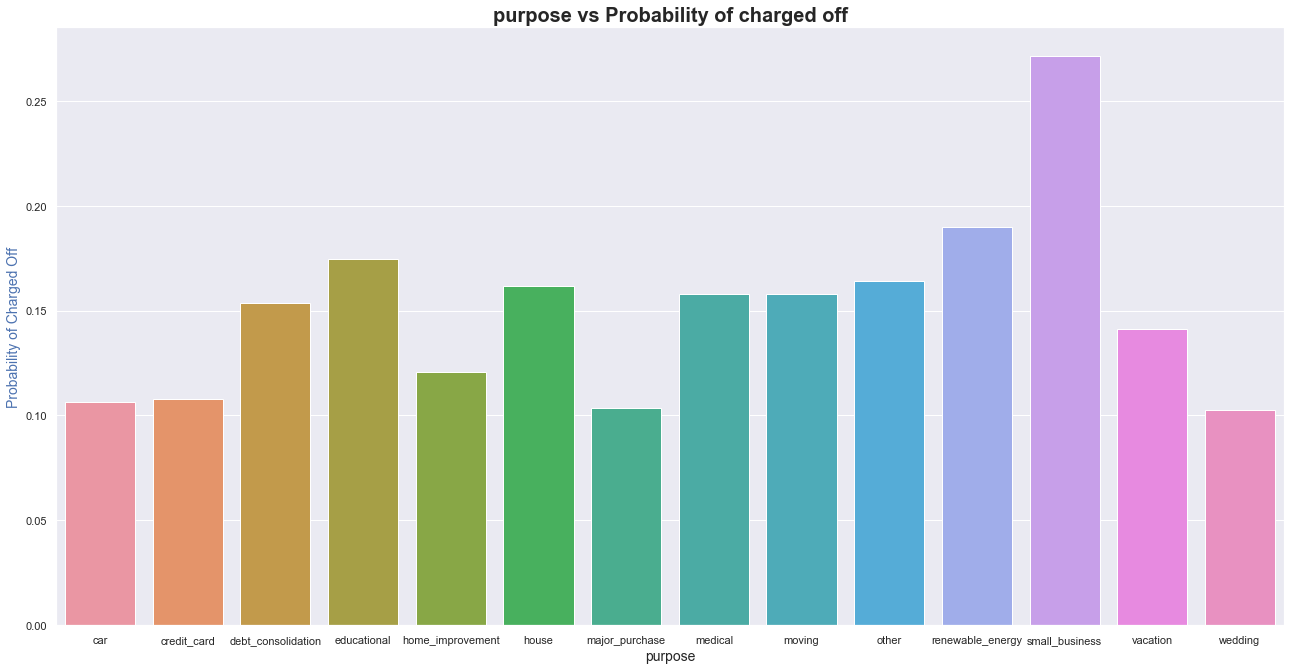

In [62]:
#Plot for purpose vs Probability of charged off
fig, ax = plt.subplots(figsize=(22,11))
sns.barplot(x=default_purp.index,y='Probability_of_Charged_Off',data=default_purp)
ax.set_title('purpose vs Probability of charged off',fontsize=20,weight="bold")
ax.set_xlabel('purpose',fontsize=14)
ax.set_ylabel('Probability of Charged Off',color = 'b',fontsize=14)

*loan taken for small business are more likely to be charged off , the probability of charged off is highest for purpose 'Small business'*

### Grade vs Probability_of_Charged_Off

In [63]:
default_grade = loan_df2.groupby(['grade','loan_status'])['loan_status'].count().unstack().fillna(0)
default_grade['Total'] = default_grade['Charged Off'] + default_grade['Fully Paid'] 
default_grade['Probability_of_Charged_Off'] = default_grade['Charged Off'] / default_grade['Total'] 

In [64]:
default_grade

loan_status,Charged Off,Fully Paid,Total,Probability_of_Charged_Off
grade,,,,
A,600,9379,9979,0.06
B,1411,10159,11570,0.12
C,1340,6418,7758,0.17
D,1111,3923,5034,0.22
E,705,1910,2615,0.27
F,314,646,960,0.33
G,99,191,290,0.34


Text(0, 0.5, 'Probability_of_Charged_Off')

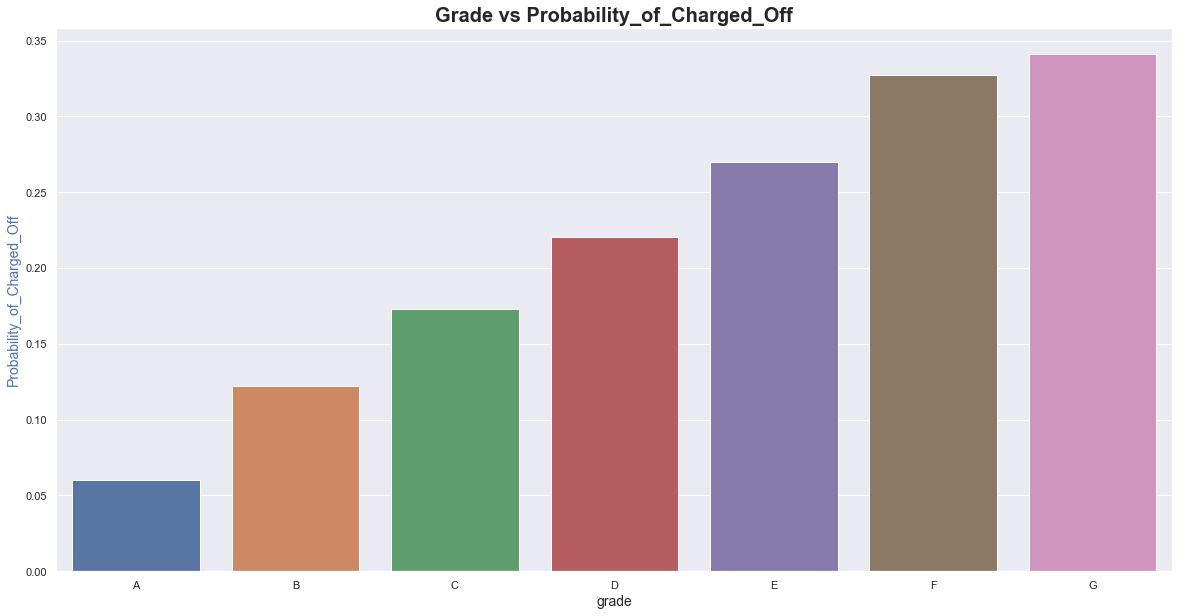

In [65]:
#Plot of grade vs Probability of charged off
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=default_grade.index,y='Probability_of_Charged_Off',data=default_grade)
ax.set_title('Grade vs Probability_of_Charged_Off',fontsize=20,weight="bold")
ax.set_xlabel('grade',fontsize=14)
ax.set_ylabel('Probability_of_Charged_Off',color = 'b',fontsize=14)

*As the grades are degrading ( Moving from A to G ) ,Probability of Charged off is increasing , Applicants with poor grade are more likely to default their loans*

### Subgrade vs Probability_of_Charged_Off

In [66]:
default_sgrade = loan_df2.groupby(['sub_grade','loan_status'])['loan_status'].count().unstack().fillna(0)
default_sgrade['Total'] = default_sgrade['Charged Off'] + default_sgrade['Fully Paid'] 
default_sgrade['Probability_of_Charged_Off'] = default_sgrade['Charged Off'] / default_sgrade['Total'] 

Text(0, 0.5, 'Probability_of_Charged_Off')

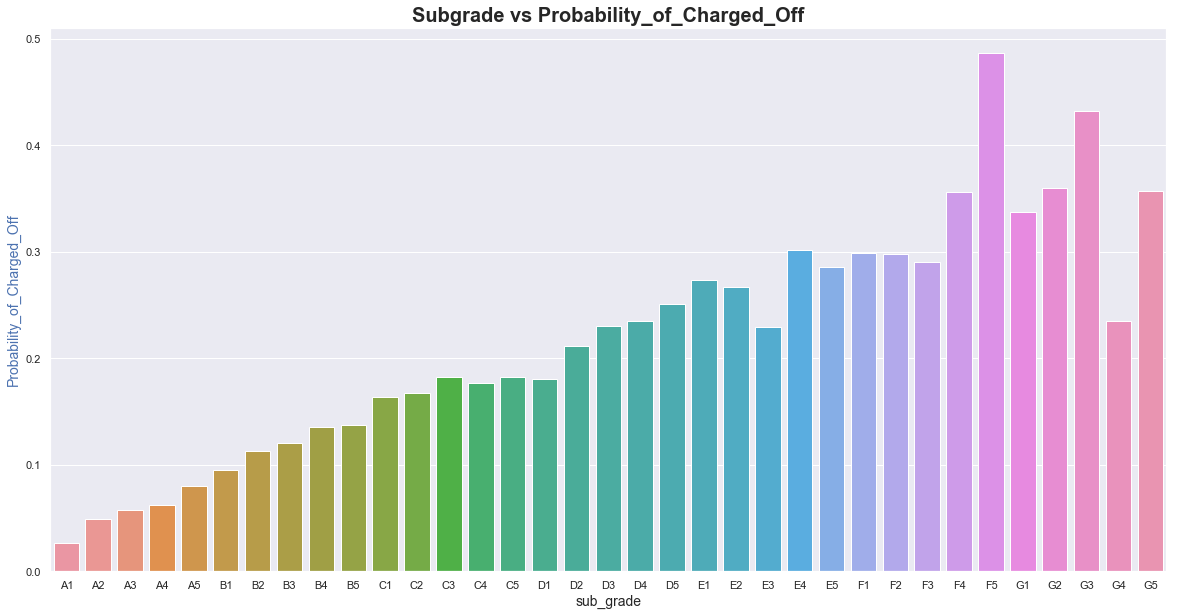

In [67]:
#Plot of subgrade vs Probability of charged off

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=default_sgrade.index,y='Probability_of_Charged_Off',data=default_sgrade)
ax.set_title('Subgrade vs Probability_of_Charged_Off',fontsize=20,weight="bold")
ax.set_xlabel('sub_grade',fontsize=14)
ax.set_ylabel('Probability_of_Charged_Off',color = 'b',fontsize=14)

*when subgrade moves from A1 towards G5 ,Probability of charged off is increasing* 

### State vs Probability_of_Charged_Off

In [68]:
#Grouping data on 'addr_state','loan_status'
default_state = loan_df2.groupby(['addr_state','loan_status'])['loan_status'].count().unstack().fillna(0)
default_state['Total'] = default_state['Charged Off'] + default_state['Fully Paid'] 
default_state['Probability_of_Charged_Off'] = default_state['Charged Off'] / default_state['Total'] 

In [69]:
default_state

loan_status,Charged Off,Fully Paid,Total,Probability_of_Charged_Off
addr_state,,,,
AK,14.00,63.00,77.00,0.18
AL,54.00,378.00,432.00,0.12
AR,26.00,208.00,234.00,0.11
AZ,120.00,718.00,838.00,0.14
CA,"1,115.00","5,770.00","6,885.00",0.16
CO,95.00,658.00,753.00,0.13
CT,94.00,620.00,714.00,0.13
DC,15.00,192.00,207.00,0.07
DE,12.00,101.00,113.00,0.11


Text(0, 0.5, 'Probability_of_Charged_Off')

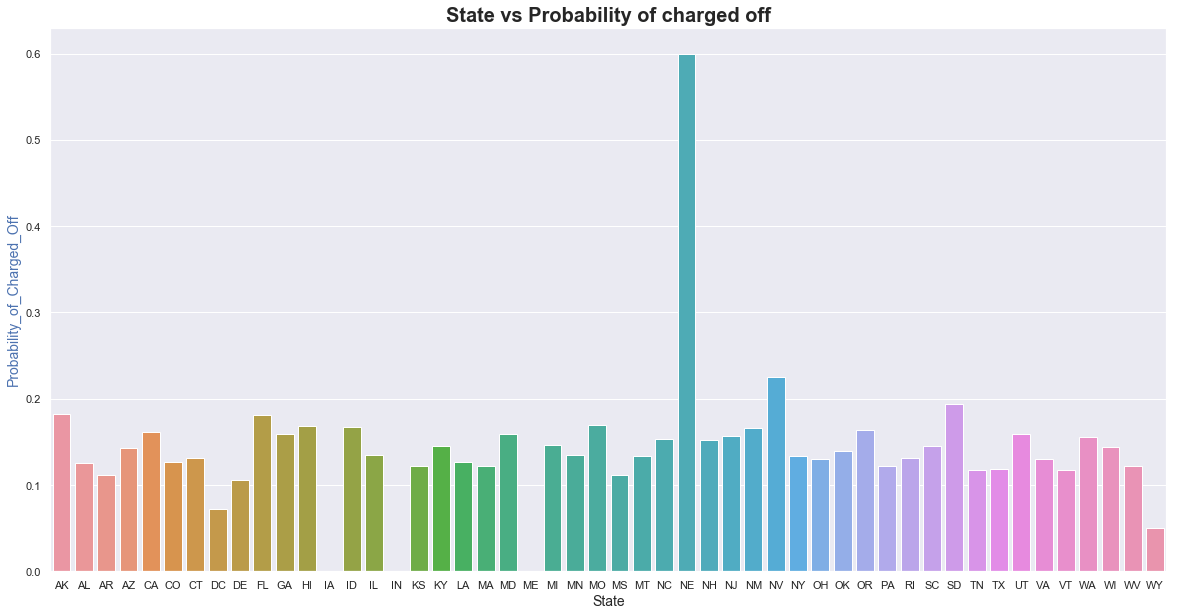

In [70]:
#Plot of addr_state vs Probability of charged off

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=default_state.index,y='Probability_of_Charged_Off',data=default_state)
ax.set_title('State vs Probability of charged off',fontsize=20,weight="bold")
ax.set_xlabel('State',fontsize=14)
ax.set_ylabel('Probability_of_Charged_Off',color = 'b',fontsize=14)

*Multiple states having approximately similar trend of probability of chargedoff , Highest probability is in 'NE' where probability is 0.60*

### home_ownership vs probability of charged off`

In [71]:
#Grouping data on home_ownership','loan_status'
default_own = loan_df2.groupby(['home_ownership','loan_status'])['loan_status'].count().unstack().fillna(0)
default_own['Total'] = default_own['Charged Off'] + default_own['Fully Paid'] 
default_own['Probability_of_Charged_Off'] = default_own['Charged Off'] / default_own['Total'] 

In [72]:
default_own

loan_status,Charged Off,Fully Paid,Total,Probability_of_Charged_Off
home_ownership,,,,
MORTGAGE,2311,14524,16835,0.14
OWN,440,2514,2954,0.15
RENT,2829,15588,18417,0.15


Text(0, 0.5, 'Probability of Charged Off')

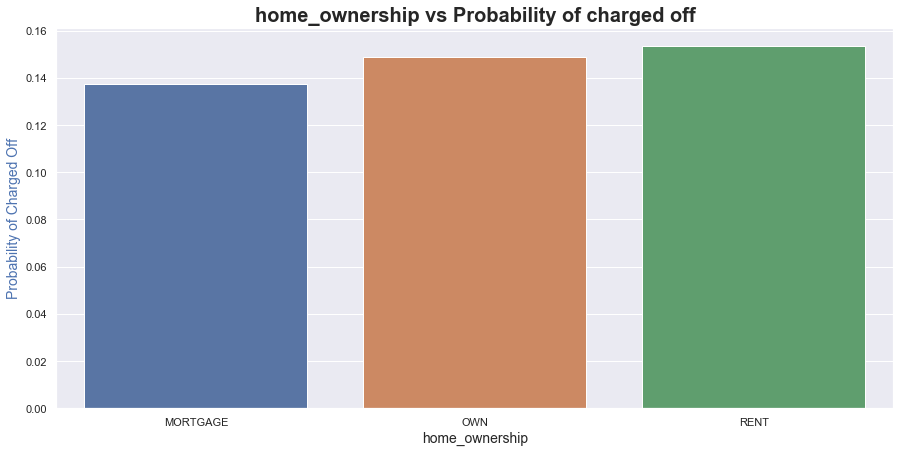

In [73]:
#Home_ownership vs Probability of charged off
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=default_own.index,y='Probability_of_Charged_Off',data=default_own)
ax.set_title('home_ownership vs Probability of charged off',fontsize=20,weight="bold")
ax.set_xlabel('home_ownership',fontsize=14)
ax.set_ylabel('Probability of Charged Off',color = 'b',fontsize=14)

*Probability of charged off across home_ownership doesn't seems to be highly differentiated,hence it cannot be considered as a driving variable for prediction of default*

### Interest Rate vs probability of charged off

In [74]:
#Grouping data on 'int_rate_range','loan_status'
default_int = loan_df2.groupby(['int_rate_range','loan_status'])['loan_status'].count().unstack().fillna(0)
default_int['Total'] = default_int['Charged Off'] + default_int['Fully Paid'] 
default_int['Probability_of_Charged_Off'] = default_int['Charged Off'] / default_int['Total'] 

In [75]:
default_int

loan_status,Charged Off,Fully Paid,Total,Probability_of_Charged_Off
int_rate_range,,,,
0-7.5,256,5096,5352,0.05
7.5-10,569,6311,6880,0.08
10-12.5,1219,8070,9289,0.13
12.5-15,1469,7330,8799,0.17
15 and above,1776,5361,7137,0.25


Text(0, 0.5, 'Probability_of_Charged_Off')

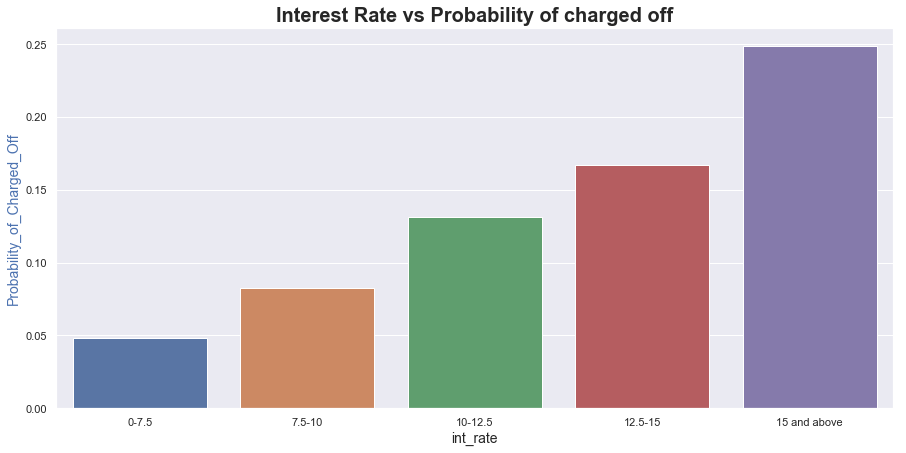

In [76]:
#int_rate vs Probability of charged off
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=default_int.index,y='Probability_of_Charged_Off',data=default_int)
ax.set_title('Interest Rate vs Probability of charged off',fontsize=20,weight="bold")
ax.set_xlabel('int_rate',fontsize=14)
ax.set_ylabel('Probability_of_Charged_Off',color = 'b',fontsize=14)

*Higher the interest rate,more probabililty that the applicant could default their loan* 

### Conclusion


#### Lending club should focus on these variables for prediction of loans more likely to default-:
##### 1.Purpose of Loan,
##### 2.Annual Income,
##### 3.Grade,
##### 4.Subgrade,
##### 5.Interest Rate
##### 6.addr_state,